# Predicting Used Car Prices

In this notebook, we will try to help some people who want to sell their used cars,  
but have no idea about how much they should sell it. We wil make a model to predict  
the prices based on specifications and conditions of the car, using RandomForestRegressor  
algorithm and fine-tune the model with GridSearchCV to get the best hyperparameter.

This project will contain the following steps :
1. Load the Datasets
2. Exploratory Data Analysis
3. Split the data using StratifiedShuffleSplit
4. Data preprocessing
5. Create custom Transformer
6. Automate process with Pipelines & Column Transformer
7. Train model using RandomForestRegressor
8. Measure using Cross Validation Score
9. Fine-tune the model using GridSearchCV
10. Evaluating system on the test set
11. Conclusion

### 1. Load the datasets

We will load the datasets in *`'datasets/used_car_prices.csv'`*

In [7]:
#import library
import pandas as pd

#reading csv file and store into "df" dataframe
df = pd.read_csv('datasets/used_car_prices.csv')

#display the first 5 rows of the data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Check the content and details

In [8]:
#show info of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


We can check whether the datasets have missing values using `df.info` . From our datasets, there is no missing values, so we're good to go to the next step. But sometimes, you will deal with datasets with a lot of missing values and have to handle them by dropping the columns or rows, or imputing them with median, etc.

The .describe also can give more detail about the datasets:

In [11]:
#show more detail about the datasets
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


From those output, we know that the oldest cars are from `1996` and the latest cars are in `2020`, etc.

### 2. Exploratory Data Analysis

Now let's get further analysis about the data

First, check the data type of each column

In [15]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In this datasets, there are 2 type of data :  *`object, int64 and float64.`*  
`object` is categorical type, while `int64` and `float64` are numerical type.  
On the next steps, we will divide those data type into categorical and numerical.

Using `df.shape`, we can check the total number of rows

In [16]:
df.shape

(10781, 9)

Our datasets have 10,781 rows and 9 columns

Let's use visualization to get more deeper analysis

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'price'}>],
       [<AxesSubplot: title={'center': 'mileage'}>,
        <AxesSubplot: title={'center': 'tax'}>],
       [<AxesSubplot: title={'center': 'mpg'}>,
        <AxesSubplot: title={'center': 'engineSize'}>]], dtype=object)

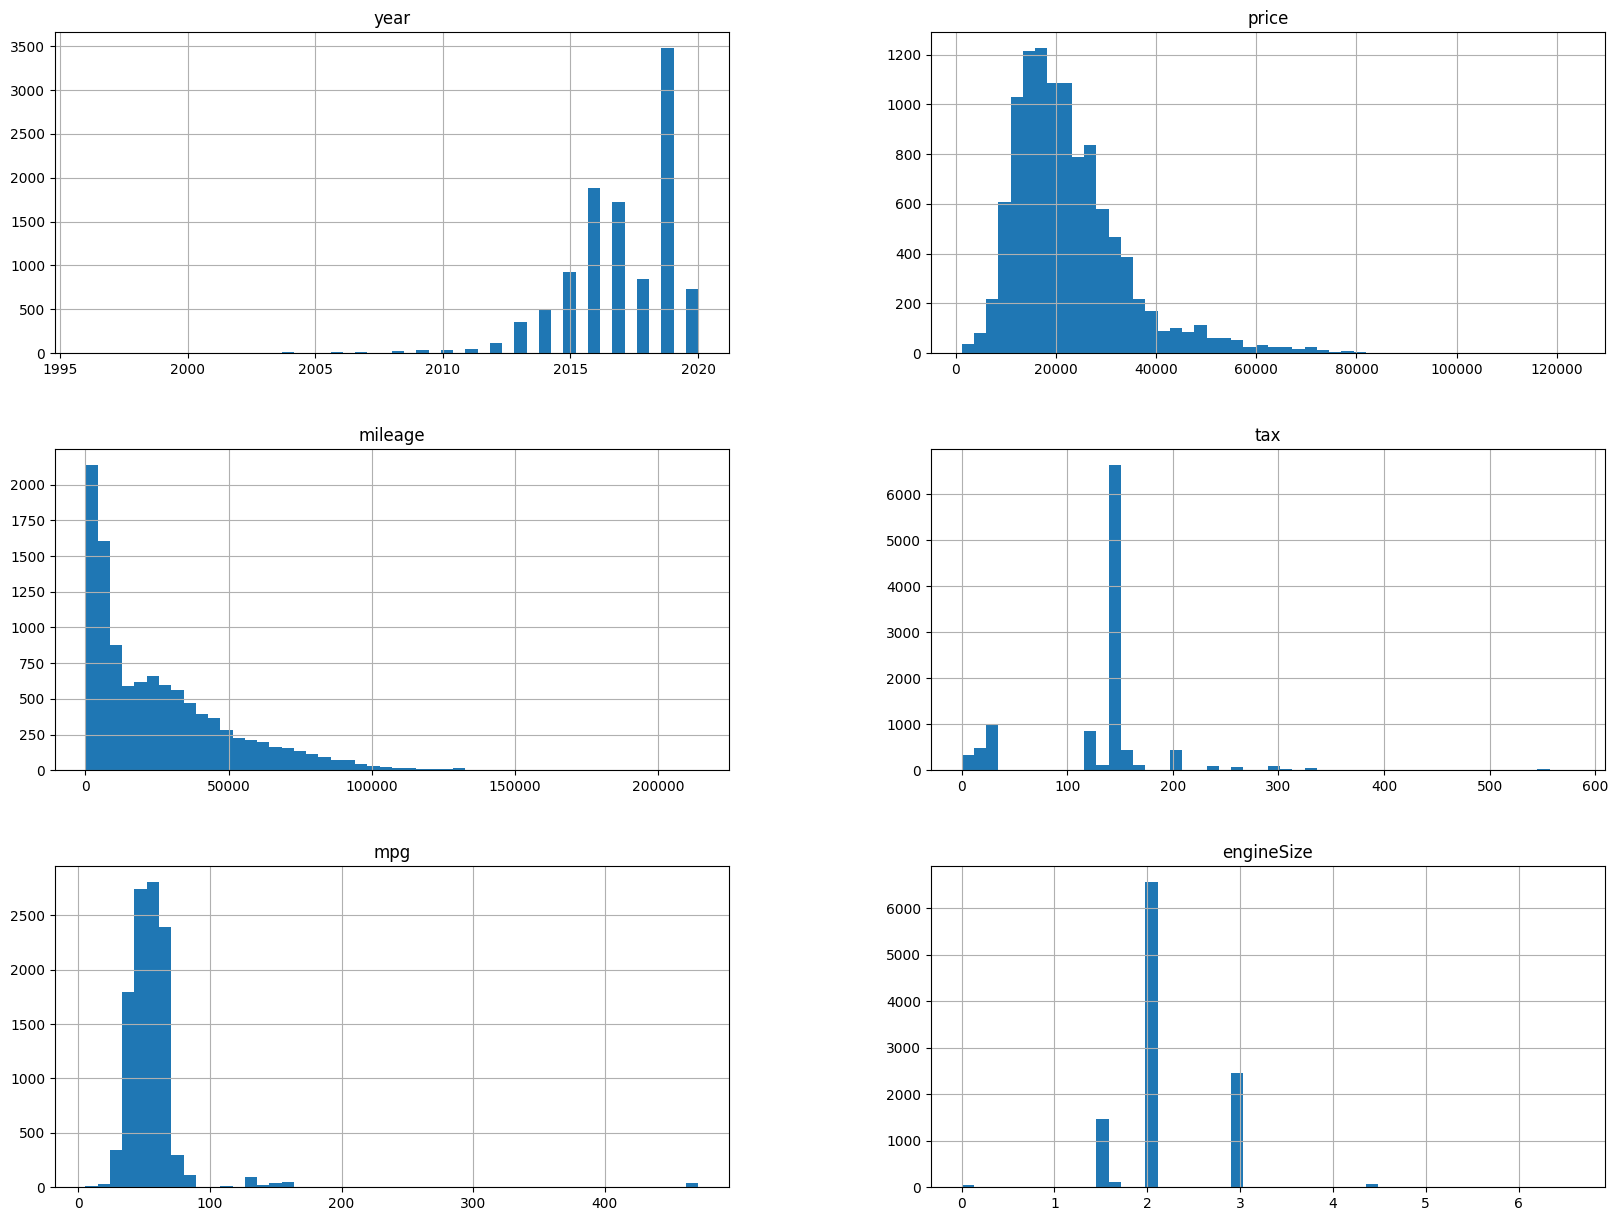

In [40]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))

### 3. Split the data using StratifiedShuffleSplit

We will split the data into training set and test set.

To avoid sampling bias, we don't want to make a random sampling set. Instead of using `train_test_split` method, we will use the `StratifiedShuffleSplit` method.

> Case why we need to use stratified sampling method:    
> *`When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. If they used purely random sampling, there would be about 12% chance of sampling a skewed test set with either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.`*

We have to check what columns have strong correlation with our target value *`price`* columns.

In [41]:
corr_matrix = df.corr()

corr_matrix['price'].sort_values(ascending=False)

C:\Users\yovan.alvianto\AppData\Local\Temp\ipykernel_15036\2278073621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price         1.000000
year          0.623756
engineSize    0.460196
tax           0.263484
mpg          -0.204882
mileage      -0.605397
Name: price, dtype: float64

Here's the breakdown :
1. Output equals 0 means have no correlation
2. Output close to 0 means have weak positive correlation
3. Output close to 1 means have strong positive correlation
4. Output close to -0 means have weak negative correlation
5. Output close to -1 means have strong negative correlation

Seems like `year` have the most positive correlation, let's stratified sampling based on `year` column.

In [48]:
import numpy as np

df['year_cat'] = pd.cut(df['year'],
                        bins=[1990, 2010, 2013, 2016, 2019, np.inf],
                        labels=(1, 2, 3, 4, 5))

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['year_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [58]:
#ratio of the stratified sampling data
strat_test_set['year_cat'].value_counts() / len(strat_test_set)

4    0.561428
3    0.306444
5    0.068150
2    0.049142
1    0.014835
Name: year_cat, dtype: float64

In [57]:
#ratio of the origin data
df['year_cat'].value_counts() / len(df)

4    0.561543
3    0.306558
5    0.067990
2    0.048882
1    0.015026
Name: year_cat, dtype: float64

Well, the stratified ratio is almost same with the ratio of the origin data. Nice!

#remove the `year_cat` columns on the training set and test set before data preprocessing steps

In [59]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('year_cat', axis=1, inplace=True)

### 4. Data preprocessing

Create copy of the datasets to explore without harming the training data

In [60]:
df = strat_train_set.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8624 entries, 616 to 9173
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8624 non-null   object 
 1   year          8624 non-null   int64  
 2   price         8624 non-null   int64  
 3   transmission  8624 non-null   object 
 4   mileage       8624 non-null   int64  
 5   fuelType      8624 non-null   object 
 6   tax           8624 non-null   int64  
 7   mpg           8624 non-null   float64
 8   engineSize    8624 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 673.8+ KB


Let's visualize the correlation between `year` and `price` columns.

<AxesSubplot: xlabel='year', ylabel='price'>

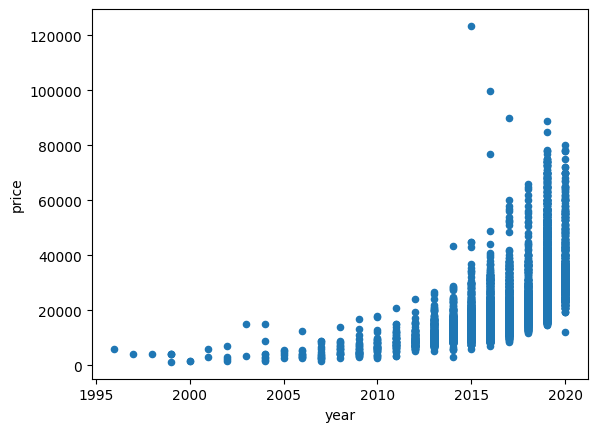

In [61]:
df.plot(kind='scatter', x='year', y='price')

There are some outliers with price above 100,000, let's remove it first.

<AxesSubplot: xlabel='year', ylabel='price'>

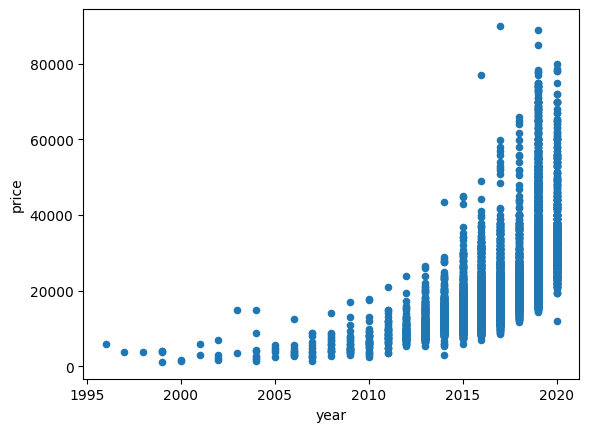

In [66]:
df = df[df['price'] < 90000]

df.plot(kind='scatter', x='year', y='price')

Now let's visualize all columns using scatter matrix

array([[<AxesSubplot: xlabel='year', ylabel='year'>,
        <AxesSubplot: xlabel='price', ylabel='year'>,
        <AxesSubplot: xlabel='mileage', ylabel='year'>,
        <AxesSubplot: xlabel='tax', ylabel='year'>,
        <AxesSubplot: xlabel='mpg', ylabel='year'>,
        <AxesSubplot: xlabel='engineSize', ylabel='year'>],
       [<AxesSubplot: xlabel='year', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='mileage', ylabel='price'>,
        <AxesSubplot: xlabel='tax', ylabel='price'>,
        <AxesSubplot: xlabel='mpg', ylabel='price'>,
        <AxesSubplot: xlabel='engineSize', ylabel='price'>],
       [<AxesSubplot: xlabel='year', ylabel='mileage'>,
        <AxesSubplot: xlabel='price', ylabel='mileage'>,
        <AxesSubplot: xlabel='mileage', ylabel='mileage'>,
        <AxesSubplot: xlabel='tax', ylabel='mileage'>,
        <AxesSubplot: xlabel='mpg', ylabel='mileage'>,
        <AxesSubplot: xlabel='engineSize', ylabel='mileage

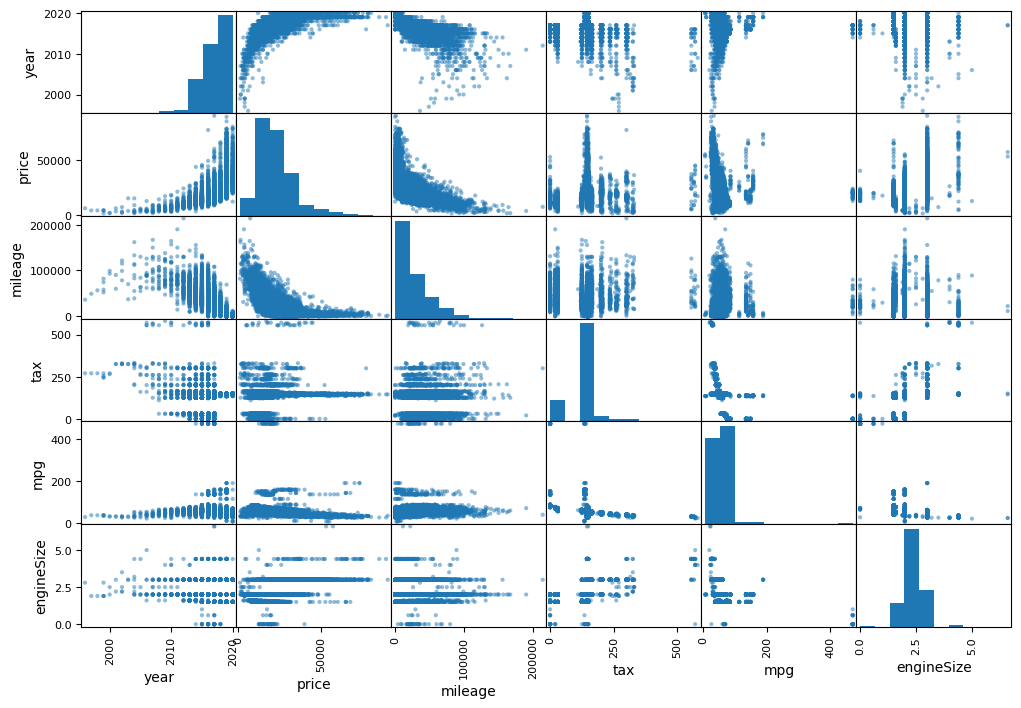

In [67]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 8))

In [68]:
#preparing data for machine learning algorithm

df = strat_train_set.drop('price', axis=1)
df_labels = strat_train_set['price'].copy()

In [70]:
#handling numerical columns
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=num_cols)


In [71]:
#handling categorical columns
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat = df.select_dtypes(include='object')

### 5. Create custom Transformer

Create custom transformer to handling columns with whitespaces and  
simplify the `model` column unique values.

In [73]:
#create custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

class ModelCategorySimplifier(BaseEstimator, TransformerMixin):
    def __init__(self, remove_whitespaces=True):
        self.remove_whitespaces = remove_whitespaces

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def simplify_category(modelname):
            if modelname[0].lower() == 'x':
                modelname = 'X series'
            elif modelname[0].lower() == 'i':
                modelname = 'I series'
            elif modelname[0].lower() == 'm':
                modelname = 'M series'
            elif modelname[0].lower() == 'z':
                modelname = 'Z series'
            else:
                modelname = 'Number Series'

            return modelname


        if self.remove_whitespaces:
            X['model'] = X['model'].apply(lambda x: x.strip())
            X['model'] = X['model'].apply(simplify_category)
            return X
        else:
            X['model'] = X['model'].apply(simplify_category)
            return X


Let's check whether our custom transformer works!

In [77]:
simplifier = ModelCategorySimplifier()
df_no_whitespaces = simplifier.transform(df)



print('Old category value: ', strat_test_set['model'].unique())
print('New category value: ', df_no_whitespaces['model'].unique())

Old category value:  [' 5 Series' ' 1 Series' ' M4' ' 3 Series' ' 2 Series' ' X1' ' X3'
 ' 4 Series' ' M3' ' X5' ' X4' ' X7' ' M6' ' X2' ' 7 Series' ' i3' ' M5'
 ' i8' ' M2' ' X6' ' 6 Series' ' 8 Series' ' Z4' ' Z3']
New category value:  ['X series' 'Number Series' 'Z series' 'M series' 'I series']


Well, now our `model` column have been simplified from 24 columns to only 5 columns

### 6. Automate process with Pipelines & Column Transformer

In [78]:
#transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('category_simplifier', ModelCategorySimplifier()),
    ('onehot', OneHotEncoder()),
])

In [79]:
#column transformer
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [80]:
df_prepared = full_pipeline.fit_transform(df)

df_prepared

array([[-0.4565421 ,  0.05136299,  1.10875494, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39373736, -0.46751774,  0.29557118, ...,  0.        ,
         0.        ,  1.        ],
       [-0.03140237,  0.84878899,  0.2142528 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8188771 , -0.81662569,  0.2142528 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.24401683, -0.63274836,  0.2142528 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8188771 , -0.9244818 ,  0.2142528 , ...,  0.        ,
         0.        ,  1.        ]])

### 7. Train model using RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RandomForestRegressor Score: ', forest_rmse)

RandomForestRegressor Score:  1217.7222967537841


### 8. Measure using Cross Validation Score

Let's cross check our result using Cross Validation Score.

In [85]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [86]:
#create function to display scores

def display_scores(scores):
    print('Score: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [87]:
display_scores(forest_rmse_scores)

Score:  [4799.621481   3022.74674602 2613.31200241 2796.98878109 2892.53993333
 2875.8872477  2779.44202623 2875.73930935 3046.61875623 3535.02465812]
Mean:  3123.792094148308
Standard Deviation:  604.6580934354889


Note that,  
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

### 9. Fine-tune the model using GridSearchCV

In [96]:
#fine tuning the model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[2, 10, 30, 50, 80], 'max_features':[2,4, 6, 8, 10, 12]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [2, 10, 30, 50, 80]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
#check best estimator
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

4224.979522784683 {'max_features': 2, 'n_estimators': 2}
3539.1934651177316 {'max_features': 2, 'n_estimators': 10}
3396.3398236214634 {'max_features': 2, 'n_estimators': 30}
3374.4505311513976 {'max_features': 2, 'n_estimators': 50}
3390.4182382490676 {'max_features': 2, 'n_estimators': 80}
4058.7652164108154 {'max_features': 4, 'n_estimators': 2}
3492.667635768726 {'max_features': 4, 'n_estimators': 10}
3362.6195749090807 {'max_features': 4, 'n_estimators': 30}
3338.444428243883 {'max_features': 4, 'n_estimators': 50}
3322.6317767917917 {'max_features': 4, 'n_estimators': 80}
3963.5771681666383 {'max_features': 6, 'n_estimators': 2}
3340.94274172757 {'max_features': 6, 'n_estimators': 10}
3298.1721823207795 {'max_features': 6, 'n_estimators': 30}
3268.367931329346 {'max_features': 6, 'n_estimators': 50}
3252.758206888828 {'max_features': 6, 'n_estimators': 80}
3841.565040455981 {'max_features': 8, 'n_estimators': 2}
3321.821316740734 {'max_features': 8, 'n_estimators': 10}
3249.26096

In [102]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 80}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=80)

In [104]:
#feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.11039965e-01, 1.95003864e-01, 2.84299631e-02, 1.39019305e-01,
       2.19320516e-01, 3.47080055e-03, 1.86035581e-03, 4.14413503e-02,
       6.88252067e-03, 5.99181999e-04, 2.43831528e-03, 2.69300907e-02,
       2.51370530e-03, 8.24511029e-03, 1.09850313e-06, 5.20401325e-03,
       4.17582281e-05, 7.55808545e-03])

In [105]:
attributes = num_attribs + cat_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.311039965133, 'year'),
 (0.21932051635824273, 'engineSize'),
 (0.19500386386506846, 'mileage'),
 (0.1390193052853629, 'mpg'),
 (0.04144135028412355, 'fuelType'),
 (0.02842996308933448, 'tax'),
 (0.0034708005529673768, 'model'),
 (0.0018603558127994269, 'transmission')]

### 10. Evaluating system on the test set

In [106]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('price', axis=1)
y_test = strat_test_set['price'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

2756.3819784092184

In [107]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([2544.84817474, 2952.80053328])

In [108]:
#predict new datasets

new_data = np.array([['6 Series', 2014, 'Automatic', 70500, 'Diesel', 150, 60.3, 2.0],
                  ['X Series', 2017, 'Manual', 69000, 'Diesel', 140, 68.53, 1.0],
                  ['Z Series', 2020, 'Automatic', 80500, 'Diesel', 120, 55.4, 3.0]])

new_df = pd.DataFrame(new_data, columns=df.columns)

new_df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,6 Series,2014,Automatic,70500,Diesel,150,60.3,2.0
1,X Series,2017,Manual,69000,Diesel,140,68.53,1.0
2,Z Series,2020,Automatic,80500,Diesel,120,55.4,3.0


In [109]:
new_df_prepared = full_pipeline.transform(new_df)

new_df_predictions = final_model.predict(new_df_prepared)

print('Predicted pricec: ', new_df_predictions)

Predicted pricec:  [12469.5125 12663.075  40647.275 ]


### 11. Conclusion